In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import plotly.express as px
import warnings
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('/Users/buidatvan/Downloads/test_mci/churn-bigml-80.csv')
test_data = pd.read_csv('/Users/buidatvan/Downloads/test_mci/churn-bigml-20.csv')


In [3]:
# Define a function to print an overview of a dataframe
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
# Display overview of the training and testing datasets
dataoveriew(train_data, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 2666

Number of features: 20

Missing values: 0

Unique values:
State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64


In [4]:
dataoveriew(test_data, 'Overiew of the test dataset')

Overiew of the test dataset:

Rows: 667

Number of features: 20

Missing values: 0

Unique values:
State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls           17
Total intl charge         132
Customer service calls      9
Churn                       2
dtype: int64


In [5]:
train_data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [7]:
train_data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
# Display descriptive statistics for categorical and boolean columns
train_data.describe(include=["object", "bool"])

,State,International plan,Voice mail plan,Churn
count,2666,2666,2666,2666
unique,51,2,2,2
top,WV,No,No,False
freq,88,2396,1933,2278


In [9]:
train_data["Churn"].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

In [10]:
train_data["Churn"].mean()

0.145536384096024

In [11]:
# Find the maximum value of 'Total intl minutes' for non-churn customers who do not have an international plan
train_data[(train_data["Churn"] == 0) & (train_data["International plan"] == "No")]["Total intl minutes"].max()

18.9

In [12]:
# Find the mean value of 'Total day minutes' for churn customers
train_data[train_data["Churn"] == 1]["Total day minutes"].mean()

205.1811855670103

In [13]:
# Define columns to show in groupby operations
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]
# Display descriptive statistics for the defined columns grouped by 'Churn' without percentiles
train_data.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                             \
                  count        mean        std  min     50%    max   
Churn                                                                
False            2278.0  175.104346  50.105334  0.0  177.90  313.8   
True              388.0  205.181186  68.490213  0.0  214.95  350.8   

      Total eve minutes                                              \
                  count        mean        std   min     50%    max   
Churn                                                                 
False            2278.0  198.853380  50.818954   0.0  199.55  354.2   
True              388.0  209.385309  50.863718  70.9  209.00  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
False              2278.0  200.464091  51.284496  43.7  200.00  395.0  
True                388.0  205.307216  47.565157  47.4  204.95  354.9

In [14]:
train_data.groupby(["Churn"])[columns_to_show].agg([np.mean])

,Total day minutes,Total eve minutes,Total night minutes
,mean,mean,mean
Churn,,,
False,175.104346,198.853380,200.464091
True,205.181186,209.385309,205.307216


In [15]:
# Display a cross-tabulation of 'State' and 'Churn'
pd.crosstab(train_data["State"], train_data["Churn"]).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,40,59,36,42,19,52,48,40,43,47,...,43,36,39,52,63,51,38,57,81,58
True,3,7,11,3,5,7,11,5,8,7,...,6,5,16,8,4,6,10,4,7,8


In [16]:
# Display a pivot table of call statistics grouped by 'Area code'
train_data.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.775785,99.563528,98.556054
415,100.230653,100.613809,100.749621
510,100.005891,99.331370,100.384389


In [17]:
# Display a normalized cross-tabulation of 'Churn' and 'Voice mail plan'
pd.crosstab(train_data["Churn"], train_data["Voice mail plan"], normalize=True)

Voice mail plan,No,Yes
Churn,,
False,0.603901,0.250563
True,0.121155,0.024381


In [18]:
# Display a normalized cross-tabulation of 'Churn' and 'International plan'
pd.crosstab(train_data["Churn"], train_data["International plan"], normalize=True)

International plan,No,Yes
Churn,,
False,0.797449,0.057014
True,0.101275,0.044261


In [19]:
# Create a pie chart to visualize customer churn in the training data
data_pie_churn = train_data['Churn'].value_counts().reset_index()
data_pie_churn.columns = ['Churn', 'Churn_count']

fig = px.pie(data_pie_churn, values='Churn_count', names='Churn', title='Customer churn in training data')
fig.update_layout(
    width=400, 
    height=400,  
)
fig.show()

<Axes: xlabel='Total intl calls'>

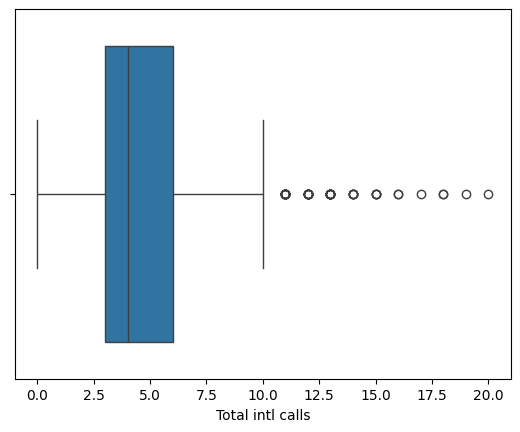

In [20]:
# Plot a boxplot of 'Total intl calls'
sns.boxplot(x="Total intl calls", data=train_data)

<Axes: xlabel='Voice mail plan', ylabel='count'>

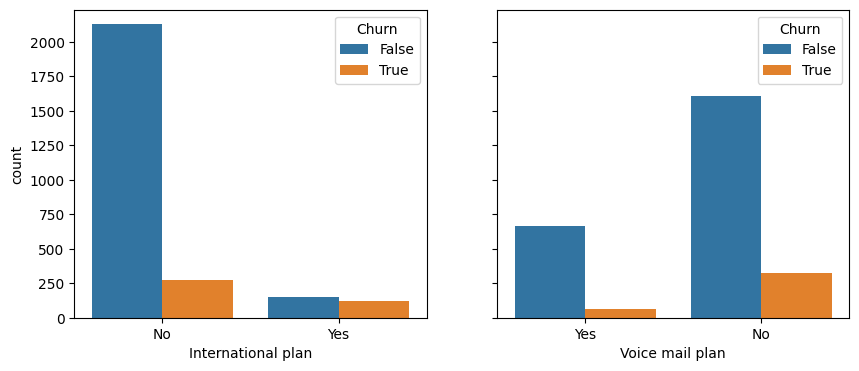

In [21]:
# Create subplots to visualize count plots for 'International plan' and 'Voice mail plan' against 'Churn'
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.countplot(x="International plan", hue="Churn", data=train_data, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=train_data, ax=axes[1])

<Axes: xlabel='Customer service calls', ylabel='count'>

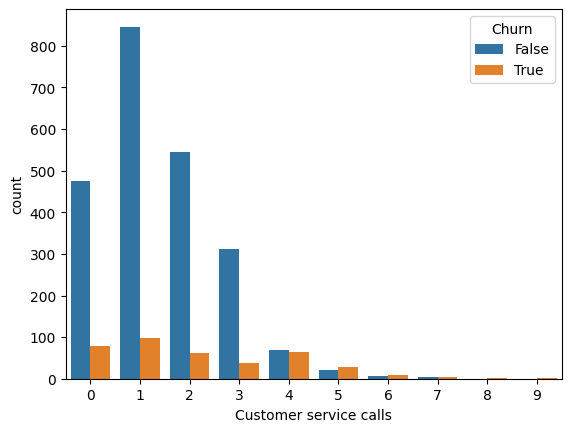

In [22]:
# Plot a count plot for 'Customer service calls' against 'Churn'
sns.countplot(x="Customer service calls", hue="Churn", data=train_data)

In [23]:
# Add a new column 'Total calls' which is the sum of various call types
train_data["Total calls"] = (
    train_data["Total day calls"]
    + train_data["Total eve calls"]
    + train_data["Total night calls"]
    + train_data["Total intl calls"]
)
train_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,359


In [24]:
# Add a new column 'Total_charge' which is the sum of various call types
train_data["Total_charge"] = (
    train_data["Total day charge"]
    + train_data["Total eve charge"]
    + train_data["Total night charge"]
    + train_data["Total intl charge"]
)
train_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total_charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,303,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,332,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,333,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,255,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,359,52.09


<Axes: xlabel='Customer service calls', ylabel='count'>

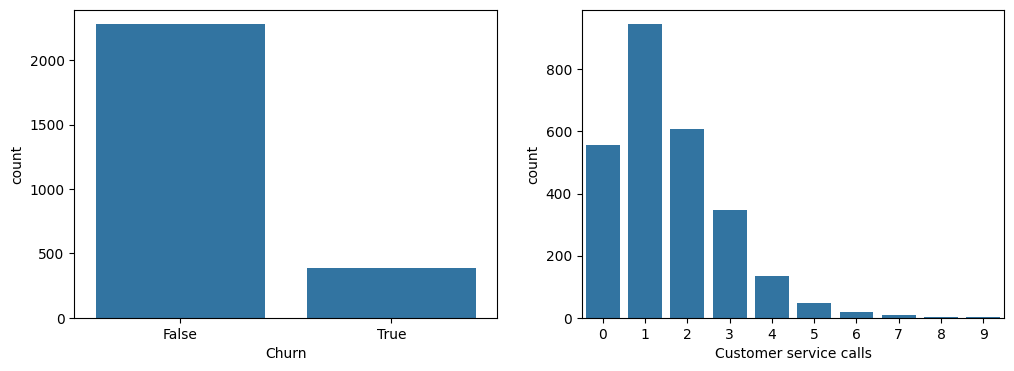

In [25]:

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=train_data, ax=axes[0])
sns.countplot(x="Customer service calls", data=train_data, ax=axes[1])


<Axes: >

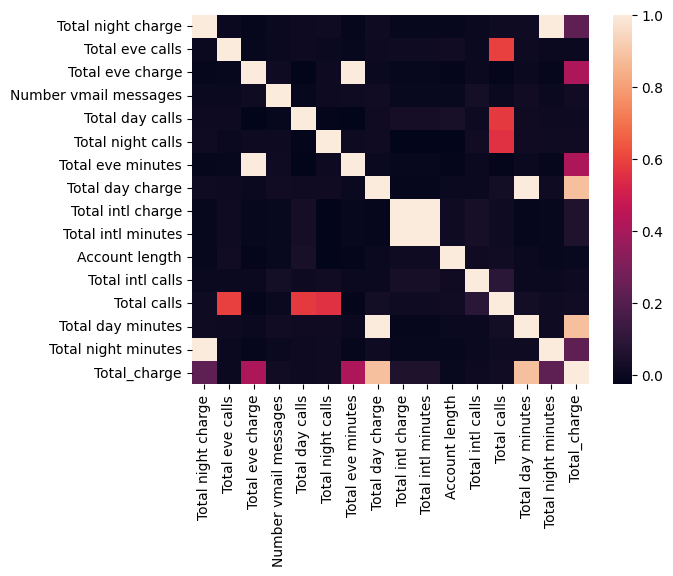

In [26]:
# Define numerical columns for correlation matrix
numerical = list(
    set(train_data.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)
# Calculate and plot the correlation matrix
corr_matrix = train_data[numerical].corr()
sns.heatmap(corr_matrix)

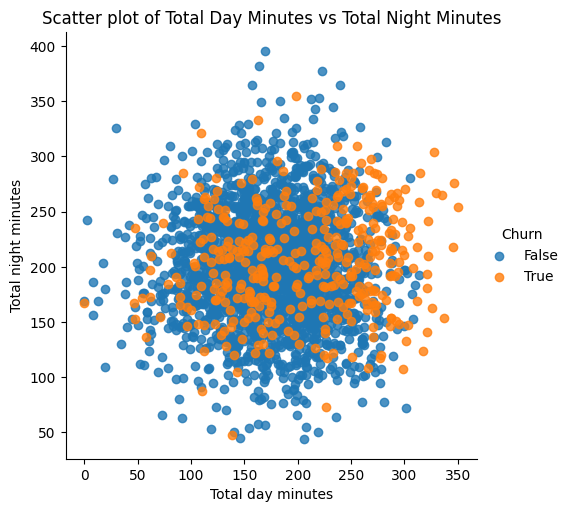

In [27]:
# Scatter plot of 'Total day minutes' vs 'Total night minutes' colored by 'Churn'
sns.lmplot(x="Total day minutes", y="Total night minutes", data=train_data, hue="Churn", fit_reg=False)
plt.title("Scatter plot of Total Day Minutes vs Total Night Minutes")
plt.show()

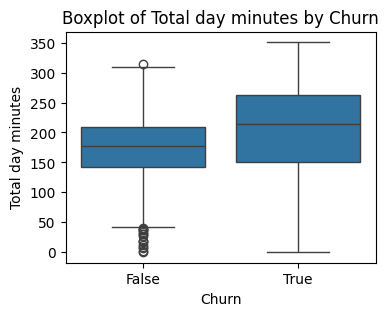

In [28]:
# Boxplot of 'Total day minutes' by 'Churn'
plt.figure(figsize=(4, 3))
sns.boxplot(x="Churn", y="Total day minutes", data=train_data)
plt.xlabel("Churn")
plt.ylabel("Total day minutes")
plt.title("Boxplot of Total day minutes by Churn")
plt.show()

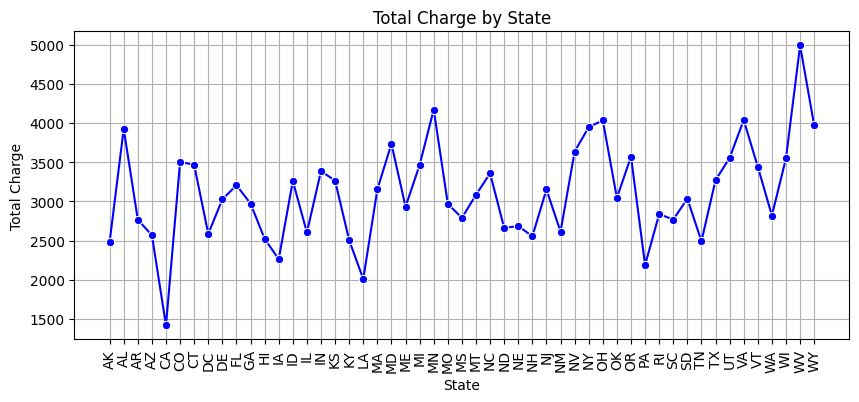

In [29]:

# Line plot of 'Total charge' by 'State'
state_charge = train_data.groupby('State')['Total_charge'].sum().reset_index()
plt.figure(figsize=(10, 4))  # Adjust the figure size if needed
sns.lineplot(data=state_charge, x='State', y='Total_charge', marker='o', linestyle='-', color='blue')
plt.title('Total Charge by State')
plt.xlabel('State')
plt.ylabel('Total Charge')
plt.xticks(rotation=90)  # Rotate state labels for better readability
plt.grid(True)
plt.show()

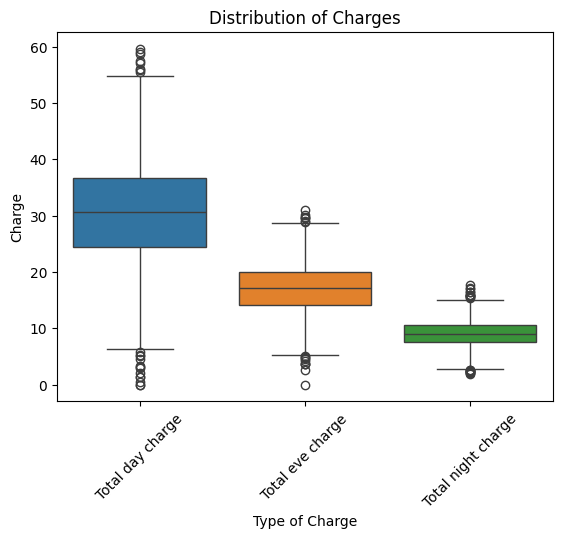

In [30]:
# Boxplot of different charges
sns.boxplot(data=train_data[['Total day charge', 'Total eve charge', 'Total night charge']])
plt.title('Distribution of Charges')
plt.ylabel('Charge')
plt.xlabel('Type of Charge')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Distribution of total charges by churn')

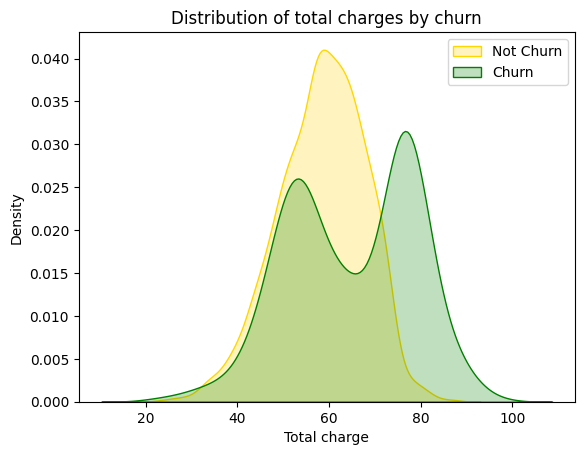

In [31]:
# KDE plot of 'Total charge' for churn and non-churn customers
ax = sns.kdeplot(train_data.Total_charge[(train_data["Churn"] == False)], color="Gold", shade=True)
ax = sns.kdeplot(train_data.Total_charge[(train_data["Churn"] == True)], ax=ax, color="Green", shade=True)

ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total charge')
ax.set_title('Distribution of total charges by churn')

In [32]:
# Drop unnecessary columns
train_data = train_data.drop(columns=['Total calls', 'Total_charge'])

In [33]:
# Map categorical columns to numerical values
train_data['International plan'] = train_data['International plan'].map({'Yes': 1, 'No': 0})
train_data['Voice mail plan'] = train_data['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [34]:
train_data['Churn'] = train_data['Churn'].astype(int)

In [35]:
test_data['International plan'] = test_data['International plan'].map({'Yes': 1, 'No': 0})
test_data['Voice mail plan'] = test_data['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [36]:
test_data['Churn'] = test_data['Churn'].astype(int)

In [37]:
# Encode the 'State' column
label_encoder = LabelEncoder()
train_data['State'] = label_encoder.fit_transform(train_data['State'])
test_data['State'] = label_encoder.transform(test_data['State'])

In [38]:
# Separate features and target variable for training and testing datasets
X_train = train_data.drop('Churn', axis=1)
y_train = train_data['Churn']
X_test = test_data.drop('Churn', axis=1)
y_test = test_data['Churn']

In [39]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [40]:
# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [41]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.92
Confusion Matrix:
[[543  29]
 [ 26  69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       572
           1       0.70      0.73      0.72        95

    accuracy                           0.92       667
   macro avg       0.83      0.84      0.83       667
weighted avg       0.92      0.92      0.92       667



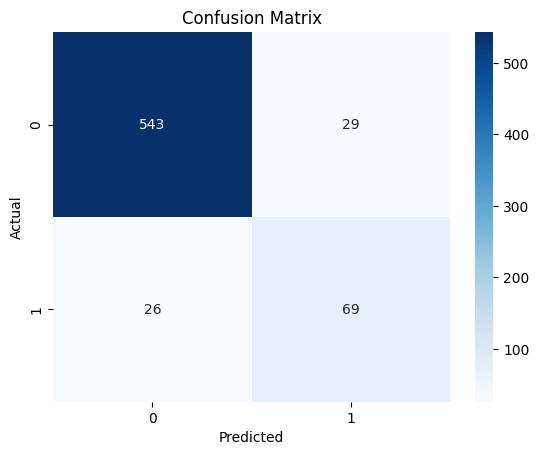

In [42]:
# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()